# KNN Regression
#### 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
#### 이웃 데이터 포인트의 평균이 예측 결과

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

### Data 가져오기

In [58]:
a = fetch_california_housing                   
data = a()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [60]:
df = pd.DataFrame(data=data.data, columns = data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [61]:
df['Target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Train, Test Data 분리하기

In [62]:
def X_y(t):
    X, y = t(return_X_y=True)
    return X, y

In [63]:
X_y(a)

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]))

In [64]:
X, y = X_y(a)

In [65]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [66]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
print("총개수 : {0}, X_train 개수 : {1}, y_train 개수 : {2}, X_test 개수 : {3}".format(len(X), len(X_train), len(y_train), len(X_test)))

총개수 : 20640, X_train 개수 : 16512, y_train 개수 : 16512, X_test 개수 : 4128


### 전처리 (standardization)

In [69]:
scaler = StandardScaler()

In [70]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### Model 적용

In [71]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print("학습 데이터 점수 : {:2f}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {:2f}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.445684
평가 데이터 점수 : 0.153372


In [72]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)
print("학습 데이터 점수 : {:.2f}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {:.2f}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.79
평가 데이터 점수 : 0.68


### Cross Validate 검증

In [73]:
estimator = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [74]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    4.7s remaining:    3.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    4.9s finished


{'fit_time': array([0.10699701, 0.14599514, 0.1009903 , 0.11653662, 0.13398385,
        0.13499665, 0.11699152, 0.10499191, 0.10300112, 0.10700154]),
 'score_time': array([0.40952778, 0.5575316 , 0.32553411, 0.40297461, 0.48353076,
        0.45152831, 0.54153967, 0.41553116, 0.30759788, 0.26863647]),
 'test_score': array([0.21742013, 0.67938059, 0.51926051, 0.47730053, 0.60903506,
        0.55878279, 0.36729332, 0.4422147 , 0.30176353, 0.62048907])}

### 최적화 조건 검토

In [75]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor())])

In [76]:
param_grid = [{'model__n_neighbors':[3, 5, 7],
              'model__weights':['uniform', 'distance'],
              'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [77]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True)

In [78]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:  1.5min finished


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [79]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [80]:
print("GridSearchCF best score : {:.4f}".format(gs.best_score_))

GridSearchCF best score : 0.5377


### 시각화

In [81]:
tsne = TSNE(n_components=1)   # regressor는 콤포넌트 변수는 1로 설정(클래스 구분이 없기 때문에)
X_comp = tsne.fit_transform(X)

In [83]:
comp_df = pd.DataFrame(data=X_comp)
comp_df["Target"] = y
comp_df

,0,Target
0,-44.179916,4.526
1,38.564526,3.585
2,-34.833160,3.521
3,-30.212566,3.413
4,-29.730436,3.422
...,...,...
20635,53.992069,0.781
20636,-42.733131,0.771
20637,96.544739,0.923
20638,40.320137,0.847


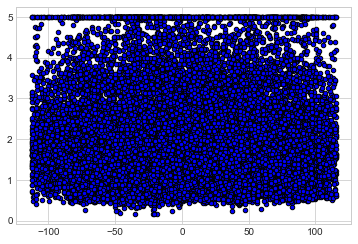

In [84]:
## 단순 시각화
plt.scatter(X_comp, y, c="b", cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [85]:
## KNN을 통한 시각화

model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

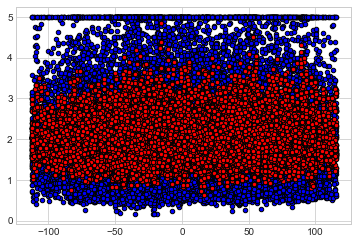

In [86]:
plt.scatter(X_comp, y, c="b", cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp, predict, c="r", cmap=plt.cm.coolwarm, s=20, edgecolors='k')